In [1]:
import sys
import os

# Ruta al proyecto raíz donde está la carpeta 'scripts'
project_root = os.path.abspath('../')  # o usa la ruta absoluta si prefieres
sys.path.append(project_root)

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dotenv import load_dotenv
from sqlalchemy import create_engine
from scripts.remove_outliers import remove_outliers

from sqlalchemy.orm import sessionmaker
pd.set_option('display.float_format', '{:.2f}'.format)


In [3]:
query = """ 
BEGIN
    DECLARE @TotalRows INT;
    DECLARE @SampleSize INT;
    DECLARE @Q1 FLOAT, @Q3 FLOAT, @IQR FLOAT;
    DECLARE @LowerBound FLOAT, @UpperBound FLOAT;

    -- Contar el total de filas
    SELECT @TotalRows = COUNT(*)
    FROM dbo.BI_GAME_SESSIONS gs
    INNER JOIN dbo.BI_CARDS crd ON crd.CARD_ID = gs.CARD_ID
    INNER JOIN dbo.BI_PLAYERS pl ON pl.PLAYER_ID = crd.PLAYER_ID
    INNER JOIN dbo.BI_PLAYERS_LEVEL_ASSIGNED pll ON pll.PLAYER_ID = pl.PLAYER_ID
    WHERE gs.INITIAL_TIME >= '2024-01-01';

    -- Calcular tamaño de muestra
    SET @SampleSize = CEILING(@TotalRows * 0.01);

    -- Calcular Q1 y Q3 usando PERCENTILE_CONT
    WITH OrderedValues AS (
        SELECT CAST(gs.INITIAL_AMOUNT AS FLOAT) AS INITIAL_AMOUNT
        FROM dbo.BI_GAME_SESSIONS gs
        INNER JOIN dbo.BI_CARDS crd ON crd.CARD_ID = gs.CARD_ID
        INNER JOIN dbo.BI_PLAYERS pl ON pl.PLAYER_ID = crd.PLAYER_ID
        INNER JOIN dbo.BI_PLAYERS_LEVEL_ASSIGNED pll ON pll.PLAYER_ID = pl.PLAYER_ID
        WHERE gs.INITIAL_TIME >= '2024-01-01'
    )
    SELECT 
        @Q1 = PERCENTILE_CONT(0.25) WITHIN GROUP (ORDER BY INITIAL_AMOUNT) OVER(),
        @Q3 = PERCENTILE_CONT(0.75) WITHIN GROUP (ORDER BY INITIAL_AMOUNT) OVER()
    FROM OrderedValues;

    -- Calcular límites de outliers
    SET @IQR = @Q3 - @Q1;
    SET @LowerBound = @Q1 - 1.5 * @IQR;
    SET @UpperBound = @Q3 + 1.5 * @IQR;

    -- Seleccionar muestra filtrando outliers
    SELECT TOP (@SampleSize)
           pl.PLAYER_ID,
           pl.DOB,
           pl.GENDER,
           gs.AVG_BET,
           gs.BET_TOTAL,
           gs.INITIAL_AMOUNT,
           gs.INITIAL_TIME,
           gs.FINAL_TIME,
           gs.INITIAL_PROMO_AMOUNT,
           gs.FINAL_AMOUNT,
           gs.FINAL_PROMO_AMOUNT,
           gs.MACHINE_ID,
           gs.WIN_TOTAL,
           gs.GAMES_PLAYED_TOTAL,
           gs.GAMES_WON_TOTAL,
           gs.TIME_ON_DEVICE_SEC,
           pll.PLAYER_LEVEL_ID
    FROM dbo.BI_GAME_SESSIONS gs
    INNER JOIN dbo.BI_CARDS crd ON crd.CARD_ID = gs.CARD_ID
    INNER JOIN dbo.BI_PLAYERS pl ON pl.PLAYER_ID = crd.PLAYER_ID
    INNER JOIN dbo.BI_PLAYERS_LEVEL_ASSIGNED pll ON pll.PLAYER_ID = pl.PLAYER_ID
    WHERE gs.INITIAL_TIME >= '2024-01-01'
      AND gs.INITIAL_AMOUNT BETWEEN @LowerBound AND @UpperBound
    ORDER BY CHECKSUM(NEWID());
END

"""

In [9]:
load_dotenv()


server = os.getenv('SERVER')
username = os.getenv('SQL_USERNAME')
password = os.getenv('SQL_PASSWORD')

## Sendero ##
database = 'ewise_BI_Snd'
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()
df_snd = pd.read_sql_query(query, engine)

## Irapuato ##
database = 'ewise_BI_Ira'
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()
df_ira = pd.read_sql_query(query, engine)


## Satelite ##
database = 'ewise_BI_Stl'
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()
df_stl = pd.read_sql_query(query, engine)

## Neza ##
database = 'ewise_BI_Nez'
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()
df_nez = pd.read_sql_query(query, engine)

## Esmeralda ##
database = 'ewise_BI_Esm'
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()
df_esm = pd.read_sql_query(query, engine)

## Allende ##
database = 'ewise_BI_All'
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()
df_all = pd.read_sql_query(query, engine)

## Ajijic ##
database = 'ewise_BI_Ajj'
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()
df_ajj = pd.read_sql_query(query, engine)

## Guadalupe ##
database = 'ewise_BI_Gpe'
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()
df_gpe = pd.read_sql_query(query, engine)

## Mitras ##
database = 'ewise_BI_Mty'
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()
df_mty = pd.read_sql_query(query, engine)




# General

In [35]:
df_snd['Casino'] = 'Sendero' 
df_ira['Casino'] = 'Irapuato'
df_stl['Casino'] = 'Satelite'
df_nez['Casino'] = 'Neza'
df_esm['Casino'] = 'Esmeralda'
df_all['Casino'] = 'Allende'
df_ajj['Casino'] = 'Ajjic'
df_gpe['Casino'] = 'Guadalupe'
df_mty['Casino'] = 'Mitras'


df = pd.concat([df_snd, df_ira, df_stl, df_nez, df_esm, df_all, df_ajj, df_gpe, df_mty])

In [36]:
df = df.loc[df['GAMES_PLAYED_TOTAL'] < 90000]
df.describe()

,AVG_BET,BET_TOTAL,INITIAL_AMOUNT,INITIAL_TIME,FINAL_TIME,INITIAL_PROMO_AMOUNT,FINAL_AMOUNT,FINAL_PROMO_AMOUNT,WIN_TOTAL,GAMES_PLAYED_TOTAL,GAMES_WON_TOTAL,TIME_ON_DEVICE_SEC,PLAYER_LEVEL_ID
count,226747.00,226737.00,226747.00,226747,226747,226747.00,226747.00,226747.00,226737.00,226747.00,226747.00,226743.00,226747.00
mean,4.42,800.47,270.69,2024-12-14 23:43:36.435668480,2024-12-14 23:58:23.530258176,2.51,224.86,1.88,-20.57,194.79,58.78,887.03,4.07
min,0.00,0.00,0.00,2024-01-01 00:05:22.767000,2024-01-01 00:23:17.347000,0.00,0.00,0.00,-9998594.00,0.00,0.00,2.00,1.00
25%,2.06,117.00,109.48,2024-09-01 05:53:43.458500096,2024-09-01 06:09:31.510000128,0.00,1.02,0.00,39.00,36.00,9.00,169.00,2.00
50%,3.40,320.00,199.12,2024-12-28 03:42:27.356999936,2024-12-28 03:57:31.676999936,0.00,9.94,0.00,176.75,89.00,26.00,411.00,4.00
75%,5.00,792.00,396.20,2025-04-13 02:55:54.496499968,2025-04-13 03:05:10.914999808,0.00,236.56,0.00,643.10,212.00,63.00,991.00,7.00
max,307.00,181003.50,1711.90,2025-08-27 06:46:54.127000,2025-08-27 06:50:03.297000,7999.00,151466.47,6572.31,461502.00,66698.00,13818.00,44055.00,9.00
std,5.03,1952.77,210.39,NaN,NaN,34.86,995.06,29.19,33905.98,360.70,109.50,1434.24,2.55


In [12]:
df = df.dropna()

In [13]:
df.select_dtypes(include=['number']).columns

Index(['AVG_BET', 'BET_TOTAL', 'INITIAL_AMOUNT', 'INITIAL_PROMO_AMOUNT',
       'FINAL_AMOUNT', 'FINAL_PROMO_AMOUNT', 'WIN_TOTAL', 'GAMES_PLAYED_TOTAL',
       'GAMES_WON_TOTAL', 'TIME_ON_DEVICE_SEC', 'PLAYER_LEVEL_ID'],
      dtype='object')

In [14]:
# from scipy.stats import pearsonr

# df_corr = df[['GAMES_PLAYED_TOTAL', 'GAMES_WON_TOTAL', 'Rango_Edad_le']]


# df_numeric = df_corr.select_dtypes(include=['int64', 'float64'])
# # DataFrame de p-valores (inicializado con NaN)
# p_values = pd.DataFrame(np.zeros((len(df_numeric.columns), len(df_numeric.columns))),
#                         columns=df_numeric.columns,
#                         index=df_numeric.columns)

# # Llenar la matriz de p-valores
# for col1 in df_numeric.columns:
#     for col2 in df_numeric.columns:
#         if col1 != col2 and not pd.isna(df_numeric[col1]).any() and not pd.isna(df_numeric[col2]).any():
#             _, p_val = pearsonr(df_numeric[col1], df_numeric[col2])
#             p_values.loc[col1, col2] = p_val
#         else:
#             p_values.loc[col1, col2] = np.nan

# print("Matriz de p-valores:")
# p_values

In [15]:
from sklearn.preprocessing import StandardScaler

# 1. Seleccionar las columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns

# 2. Excluir 'PLAYER_LEVEL_ID'
cols_to_scale = num_cols.drop('PLAYER_LEVEL_ID')

# 3. Instanciar el StandardScaler
scaler = StandardScaler()

# 4. Ajustar y transformar las columnas
scaled_values = scaler.fit_transform(df[cols_to_scale])

# 5. Crear nuevas columnas con sufijo '_std'
scaled_df = pd.DataFrame(scaled_values, columns=[f"{col}_std" for col in cols_to_scale], index=df.index)

# 6. Concatenar al dataframe original
df = pd.concat([df, scaled_df], axis=1)


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df ['GENDER'] = le.fit_transform(df['GENDER'])

In [17]:
df['DOB'] = pd.to_datetime(df['DOB'])
hoy = datetime.now()
df['Edad'] = hoy.year - df['DOB'].dt.year
df['Edad'] -= ((hoy.month < df['DOB'].dt.month) | 
               ((hoy.month == df['DOB'].dt.month) & 
                (hoy.day < df['DOB'].dt.day)))

bins = [18, 25, 35, 45, 55, 65, 100]  # 100 es un valor arbitrario para cubrir edades mayores a 65
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Crear la columna 'Rango_Edad'
df['Rango_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

In [18]:
le_edad = LabelEncoder()
df['Rango_Edad_le'] = le_edad.fit_transform(df['Rango_Edad'])

In [19]:
df_casinos = df.groupby('Casino').mean(numeric_only=True)

In [20]:
df[ 'GAMES_PLAYED_TOTAL']

0        84.00
1         3.00
2       179.00
3        86.00
4       134.00
         ...  
96578   165.00
96579    61.00
96580    40.00
96581    89.00
96582    79.00
Name: GAMES_PLAYED_TOTAL, Length: 226733, dtype: float64

In [21]:
columns_selected = ['GENDER','AVG_BET_std',
        'INITIAL_AMOUNT_std', 'FINAL_AMOUNT_std',
        'GAMES_PLAYED_TOTAL_std',
       'GAMES_WON_TOTAL_std', 'Rango_Edad_le']
df_scaled = df[columns_selected]
df_casinos_scaled = df_casinos[columns_selected]

In [22]:
df_scaled.head()

,GENDER,AVG_BET_std,INITIAL_AMOUNT_std,FINAL_AMOUNT_std,GAMES_PLAYED_TOTAL_std,GAMES_WON_TOTAL_std,Rango_Edad_le
0,0,-0.68,-0.68,-0.12,-0.31,-0.12,4
1,0,-0.28,-0.43,-0.05,-0.53,-0.53,4
2,0,-0.16,-0.64,-0.23,-0.04,-0.01,4
3,0,-0.22,-0.43,-0.23,-0.30,-0.26,4
4,1,4.08,0.87,-0.21,-0.17,0.03,4


/var/folders/ld/2yb_9mvs5t90r3x4r3v3btbc0000gn/T/ipykernel_73582/70471493.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casinos_scaled['PCA1'] = components[:, 0]
/var/folders/ld/2yb_9mvs5t90r3x4r3v3btbc0000gn/T/ipykernel_73582/70471493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_casinos_scaled['PCA2'] = components[:, 1]


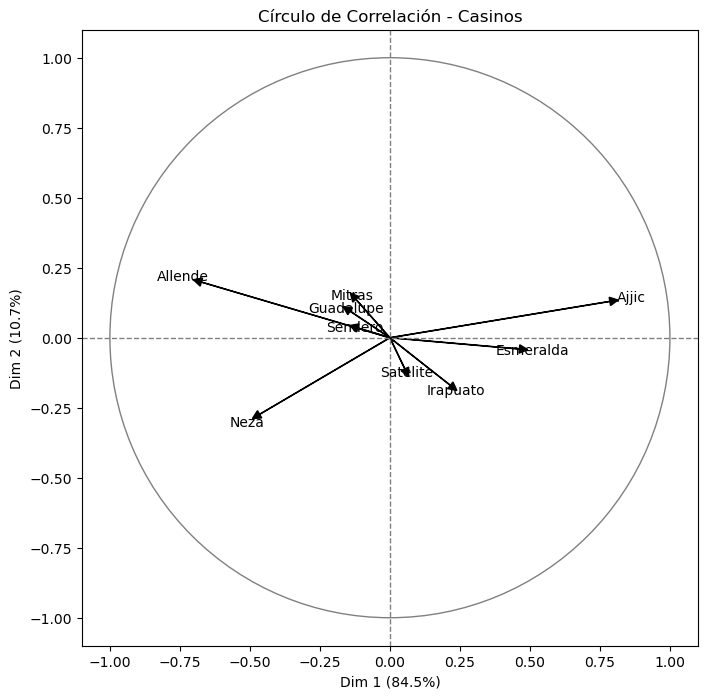

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

components = pca.fit_transform(df_casinos_scaled)
df_casinos_scaled['PCA1'] = components[:, 0]
df_casinos_scaled['PCA2'] = components[:, 1]


casinos = df_casinos_scaled.index

# Coordenadas de los casinos en el espacio PCA
xs = components[:, 0]
ys = components[:, 1]

# -----------------------
# GRAFICAR COMO CÍRCULO
# -----------------------
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)

# Dibujar líneas para cada casino
for i in range(len(casinos)):
    ax.arrow(0, 0, xs[i], ys[i],
             head_width=0.03, head_length=0.03,
             fc='black', ec='black')
    ax.text(xs[i]*1.1, ys[i]*1.1, casinos[i], ha='center', va='center')

# Estética del gráfico
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel(f'Dim 1 ({round(pca.explained_variance_ratio_[0]*100, 1)}%)')
ax.set_ylabel(f'Dim 2 ({round(pca.explained_variance_ratio_[1]*100, 1)}%)')
ax.set_title('Círculo de Correlación - Casinos')
ax.axhline(0, color='gray', lw=1, ls='--')
ax.axvline(0, color='gray', lw=1, ls='--')
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
    

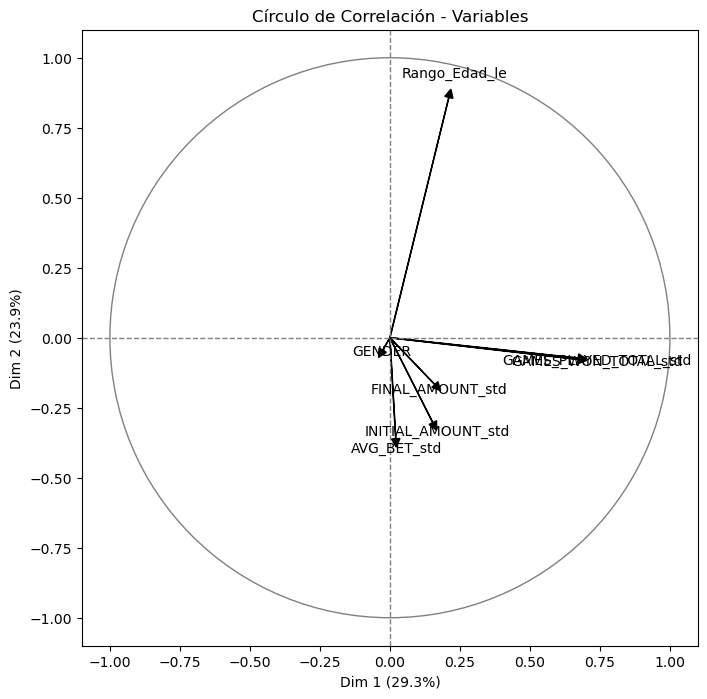

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Paso 3: Extraer los loadings (pesos de las variables en cada componente)
loadings = pca.components_.T  # Transponer para tener: variables x componentes
variables = df_scaled.columns

# Paso 4: Graficar el círculo
fig, ax = plt.subplots(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)

for i in range(len(variables)):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1],
             head_width=0.03, head_length=0.03,
             fc='black', ec='black')
    ax.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1,
            variables[i], ha='center', va='center')

# Estética del gráfico
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel(f'Dim 1 ({round(pca.explained_variance_ratio_[0]*100, 1)}%)')
ax.set_ylabel(f'Dim 2 ({round(pca.explained_variance_ratio_[1]*100, 1)}%)')
ax.set_title('Círculo de Correlación - Variables')
ax.axhline(0, color='gray', lw=1, ls='--')
ax.axvline(0, color='gray', lw=1, ls='--')
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# KMeans

In [25]:
columns_selected = ['AVG_BET_std',
        'INITIAL_AMOUNT_std', 'GAMES_PLAYED_TOTAL_std',
        'GAMES_WON_TOTAL_std', 'Rango_Edad_le']
df_selected_kmeans = df[columns_selected]

In [26]:
from sklearn.cluster import KMeans

wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_selected_kmeans)
    wss.append(kmeans.inertia_)


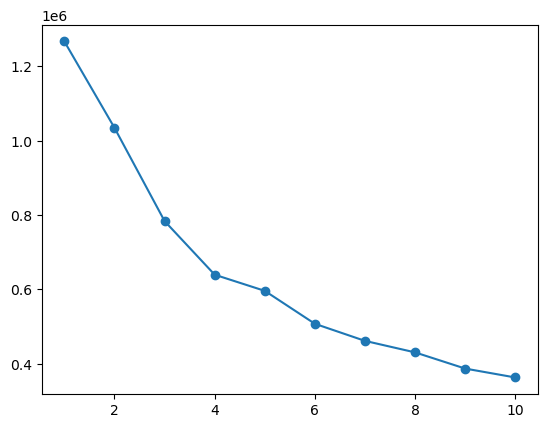

In [27]:
plt.plot(range(1, 11), wss, marker='o')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_selected_kmeans)


KMeans(n_clusters=4)

In [29]:
clusters = kmeans.predict(df_selected_kmeans)

In [30]:
df_clusters = df.copy()
df_clusters['Cluster'] = clusters

In [31]:
df_clusters.groupby('Cluster').agg({
     'AVG_BET': 'mean',
    'INITIAL_AMOUNT': 'mean',
    'GAMES_PLAYED_TOTAL': 'mean',
    'GAMES_WON_TOTAL': 'mean',
    'Edad': 'mean',
}).reset_index()

,Cluster,AVG_BET,INITIAL_AMOUNT,GAMES_PLAYED_TOTAL,GAMES_WON_TOTAL,Edad
0,0,3.94,260.54,114.96,33.58,65.65
1,1,5.16,269.12,114.83,33.88,43.09
2,2,3.77,322.39,2321.93,744.96,59.29
3,3,4.06,333.15,778.64,239.68,59.36


In [32]:
df_clusters.to_csv('../data/data_general.csv')

In [33]:
df_clusters.groupby(['Cluster', 'Casino']).agg({
    'AVG_BET': 'mean',
    'INITIAL_AMOUNT': 'mean',
    'GAMES_PLAYED_TOTAL': 'mean',
    'GAMES_WON_TOTAL': 'mean',
    'Edad': 'mean',
})

AVG_BET  INITIAL_AMOUNT  GAMES_PLAYED_TOTAL  \
Cluster Casino                                                   
0       Ajjic         5.05          445.68              106.24   
        Allende       2.67          171.02              133.66   
        Esmeralda     5.31          343.68               89.96   
        Guadalupe     3.90          251.41              115.58   
        Irapuato      5.08          317.21              116.90   
        Mitras        3.92          258.67              117.64   
        Neza          3.38          203.39              111.29   
        Satelite      4.22          296.48               94.47   
        Sendero       4.04          264.54              111.72   
1       Ajjic         6.76          399.35              112.20   
        Allende       3.24          177.58              138.31   
        Esmeralda     8.03          358.06               99.51   
        Guadalupe     5.10          277.52              114.67   
        Irapuato      6.88          307.57              113.12   
        Mitras        5.21          269.15              116.57   
        Neza          4.43          212.63              109.35   
        Satelite      5.76          287.76               96.11   
        Sendero       5.04          271.35              111.93   
2       Ajjic         6.37          628.82             2590.04   
        Allende       2.35          240.10             2125.39   
        Esmeralda     7.60          479.14             5104.96   
        Guadalupe     3.76          308.62             2364.23   
        Irapuato      4.28          453.93             2568.86   
        Mitras        3.87          333.00             2247.66   
        Neza          2.94          280.71             2411.80   
        Satelite      4.51          400.31             2540.59   
        Sendero       3.48          307.59             2236.97   
3       Ajjic         5.72          621.46              749.98   
        Allende       2.53          216.81              781.26   
        Esmeralda     6.39          531.85              697.56   
        Guadalupe     4.10          325.08              792.88   
        Irapuato      5.21          484.23              766.36   
        Mitras        4.08          329.89              773.31   
        Neza          3.31          287.63              833.83   
        Satelite      4.52          384.10              729.88   
        Sendero       4.05          337.54              769.80   

                   GAMES_WON_TOTAL  Edad  
Cluster Casino                            
0       Ajjic                29.23 67.14  
        Allende              40.74 65.54  
        Esmeralda            27.98 66.45  
        Guadalupe            33.14 65.36  
        Irapuato             29.92 64.60  
        Mitras               35.17 65.99  
        Neza                 27.58 64.50  
        Satelite             29.42 65.99  
        Sendero              32.43 64.81  
1       Ajjic                32.25 41.94  
        Allende              38.94 42.16  
        Esmeralda            32.57 42.62  
        Guadalupe            34.03 43.26  
        Irapuato             29.59 43.65  
        Mitras               34.90 43.41  
        Neza                 28.73 41.77  
        Satelite             29.99 43.93  
        Sendero              33.38 42.18  
2       Ajjic               784.87 57.26  
        Allende             712.37 59.86  
        Esmeralda          1371.84 61.40  
        Guadalupe           748.58 59.19  
        Irapuato            750.14 60.50  
        Mitras              737.75 59.45  
        Neza                620.41 56.20  
        Satelite            807.41 58.19  
        Sendero             729.39 59.01  
3       Ajjic               204.96 61.91  
        Allende             254.11 59.32  
        Esmeralda           217.61 59.86  
        Guadalupe           241.12 58.87  
        Irapuato            200.01 58.59  
        Mitras              243.11 59.87  
     

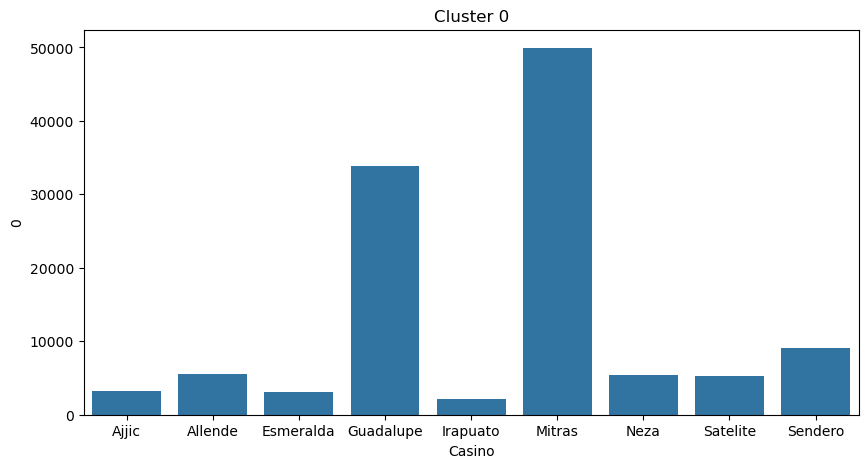

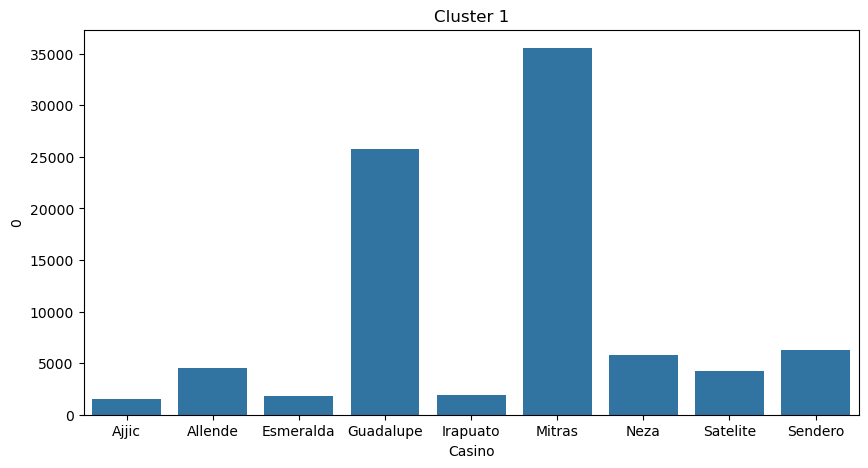

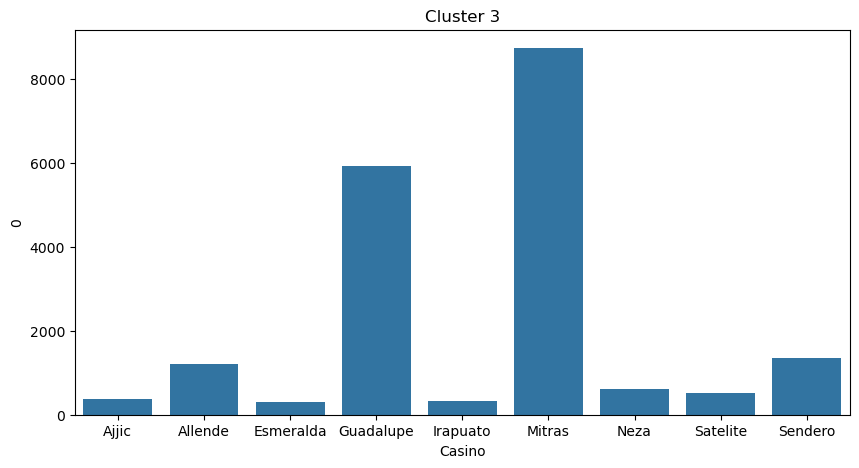

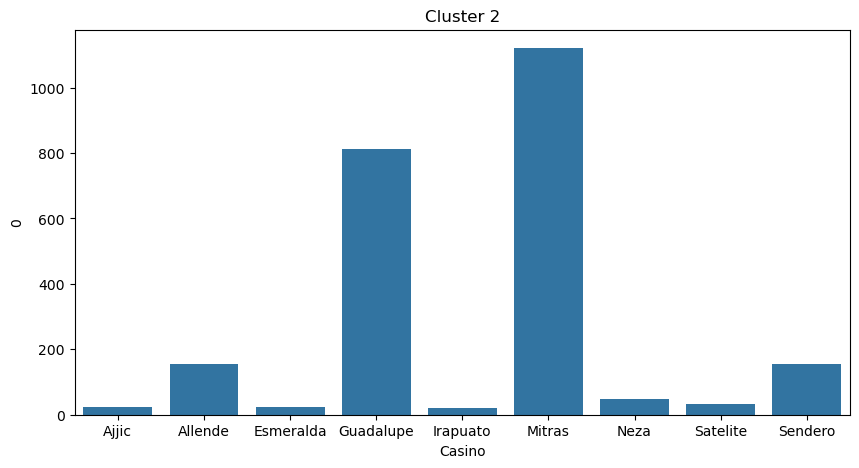

In [34]:
for i in df_clusters['Cluster'].unique():
    df_cluster_dist_casino = df_clusters.loc[df_clusters['Cluster'] == i]
    df_cluster_dist_casino = df_cluster_dist_casino.groupby('Casino').size().reset_index()

    plt.figure(figsize=(10,5))
    plt.title(f'Cluster {i}')
    sns.barplot(df_cluster_dist_casino, x='Casino', y=0)